In [26]:
import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt 
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format 
pd.options.display.max_rows = None 
pd.options.display.max_columns = None 
sns.set()

In [27]:
#wrangle fun 
def wrangle (filename , encoding , dropna_column_names= None , change_columns_names= None , date_column = None , remove_duplicated_rows_in_col = []):
    #loading data from csv
    df = pd.read_csv(filename ,encoding= encoding)
    
    #delete NaN rows in column orderid
    df.dropna(subset= dropna_column_names ,inplace=True)
    
    #Rename columns 
    df = df.rename(columns= change_columns_names )
    
    #change orderDate type to datetime 
    df[date_column] = pd.to_datetime(df[date_column])
    
    #drop duplicated rows
    df = df.drop_duplicates(subset= remove_duplicated_rows_in_col)
    
    # strip and lower case column 
    df.columns = df.columns.str.strip().str.lower()
   
    
    return df
    
   

In [28]:
#loading data 
orders = wrangle('all_data.csv' , "latin-1" ,dropna_column_names=['OrderID'] , change_columns_names={'City.1' : 'SuppCity', 'Country.1' : 'SuppCountry' , 'Phone.1' : 'SuppPhone'} , date_column = 'OrderDate' , remove_duplicated_rows_in_col = ['OrderID'])
for cols in orders.columns:
    if 'ID' in cols or 'OrderNumber' in cols : 
        orders[cols] = orders[cols].astype(int)
        
orders = orders[['customerid','firstname','lastname','city','country','orderid','ordernumber','orderdate','totalamount']]
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 830 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   830 non-null    float64       
 1   firstname    830 non-null    object        
 2   lastname     830 non-null    object        
 3   city         830 non-null    object        
 4   country      830 non-null    object        
 5   orderid      830 non-null    float64       
 6   ordernumber  830 non-null    float64       
 7   orderdate    830 non-null    datetime64[ns]
 8   totalamount  830 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 64.8+ KB


In [29]:
#Describe TotalAmount col
orders.totalamount.describe()

count      830.00
mean     1,631.88
std      1,990.61
min         12.50
25%        480.00
50%      1,015.90
75%      2,028.65
max     17,250.00
Name: totalamount, dtype: float64

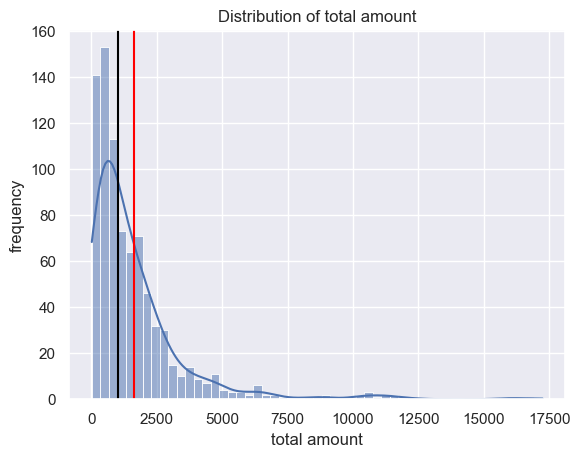

In [30]:
#Data shape
sns.histplot(data=orders , x='totalamount',kde=True)
plt.title('Distribution of total amount')
plt.xlabel('total amount')
plt.ylabel('frequency')
plt.axvline(orders.totalamount.mean() , color='red')
plt.axvline(orders.totalamount.median() , color='black')



In [31]:
min = orders.totalamount.min() 
q1 = orders.totalamount.quantile(0.25) 
q2 = orders.totalamount.median() 
q3 = orders.totalamount.quantile(0.75) 
IQR = q3-q1 
lb = q1-(1.5*IQR)
ub = q3+(1.5*IQR)

print(f'min= {min} , q1= {q1} , q2= {q2} , q3= {q3} , IQR= {IQR} , LB= {lb : .3f} , UB= {ub}')








min= 12.5 , q1= 480.0 , q2= 1015.9 , q3= 2028.65 , IQR= 1548.65 , LB= -1842.975 , UB= 4351.625


<Axes: xlabel='totalamount'>

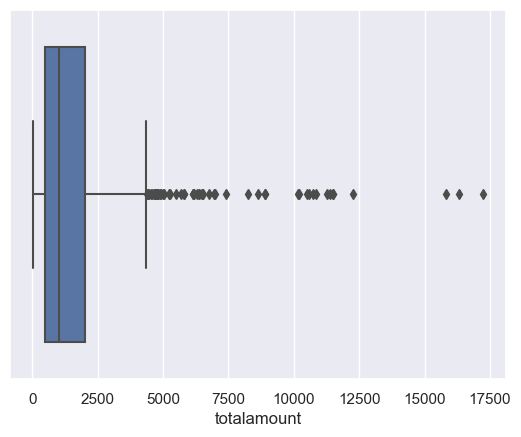

In [32]:
sns.boxplot(data=orders , x='totalamount')

In [33]:
px.box(data_frame=orders , x='totalamount')

In [34]:
orders[orders.totalamount>15000].count() 

customerid     3
firstname      3
lastname       3
city           3
country        3
orderid        3
ordernumber    3
orderdate      3
totalamount    3
dtype: int64

In [35]:
orders = orders[orders.totalamount<15000]

In [36]:
orders.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 827 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customerid   827 non-null    float64       
 1   firstname    827 non-null    object        
 2   lastname     827 non-null    object        
 3   city         827 non-null    object        
 4   country      827 non-null    object        
 5   orderid      827 non-null    float64       
 6   ordernumber  827 non-null    float64       
 7   orderdate    827 non-null    datetime64[ns]
 8   totalamount  827 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 64.6+ KB


In [37]:
orders.city.value_counts()

city
London             46
Rio de Janeiro     33
Sao Paulo          31
Graz               30
Boise              30
México D.F.        28
Cunewalde          27
Cork               19
Br?cke             19
San Crist?bal      18
Albuquerque        18
Lule?              18
Marseille          17
Buenos Aires       16
Frankfurt a.M.     15
Oulu               15
München            15
Brandenburg        14
Tsawassen          14
Toulouse           14
Seattle            14
Barquisimeto       14
Montréal           13
Lisboa             13
I. de Margarita    12
Reggio Emilia      12
Portland           12
Charleroi          12
?rhus              11
Eugene             11
Strasbourg         11
Genève             10
Lyon               10
Bergamo            10
Stuttgart          10
Sevilla            10
Anchorage          10
Salzburg           10
Cowes              10
K?ln               10
Campinas            9
Resende             9
Lander              9
Bern                8
Madrid              8
Bruxe

In [38]:
px.bar(data_frame=orders.city.value_counts() , title='Distribution of cities')

In [39]:
px.bar(data_frame=orders.country.value_counts() , title='Distribution of countries')


In [40]:
px.pie(data_frame=orders , names='country' , title='Distribution of countries')


 <h1> BI Variate analysis <h1>

In [41]:
orders.groupby('country' , as_index=False)['totalamount'].sum().sort_values('totalamount' , ascending=False)

,country,totalamount
19,USA,"247,245.08"
8,Germany,"227,390.63"
1,Austria,"139,496.63"
3,Brazil,"99,158.48"
7,France,"85,498.76"
20,Venezuela,"60,814.89"
18,UK,"60,616.51"
16,Sweden,"59,523.70"
9,Ireland,"57,317.39"
4,Canada,"55,334.10"


In [42]:
def plots(columnname , Top10=False):
    
    #Proportion of each country's total amount = sum of total amount of each country / sum of all total amount 
    prop = orders.groupby(columnname , as_index =False)['totalamount'].sum()
    prop['proportion'] = (prop.totalamount / orders.totalamount.sum())*100
    prop = prop.sort_values('proportion' , ascending=False)
    print('Descripe of all Total amount values' , prop.totalamount.describe())
    
    if Top10==True: 
        prop = prop.head(10)
        
    fig1 = px.bar(data_frame=prop , x= columnname , y='totalamount')
    fig2 = px.pie(data_frame=prop , names= columnname , values='totalamount')
    
    fig1.show()
    fig2.show()

In [43]:
plots("city", Top10=True)

Descripe of all Total amount values count        69.00
mean     18,914.15
std      22,692.99
min         357.00
25%       4,788.06
50%      11,830.10
75%      23,850.95
max     113,236.68
Name: totalamount, dtype: float64


<h3><u>Time Series analysis </u> <h3>
<ul>
  <li><p> OrderDate vs Total Amount analysis <p></li>
</ul>

In [44]:
date_total = orders[['orderdate' , 'totalamount']]
date_total = date_total.set_index('orderdate')

In [45]:
px.line(data_frame= date_total)

<ul>
  <li><p> OrderDate vs Total Amount analysis <p></li>
</ul>

In [46]:
date_country = orders[['orderdate' , 'country']]
date_country = date_country.set_index('orderdate')
date_country = date_country.country.resample(rule='1M').nunique()


In [47]:
px.line(data_frame= date_country , y='country')


<ul>
  <li><p> Customers vs Total Amount analysis <p></li>
</ul>

In [51]:
cust_orders = {
    'fullname': orders.firstname + ' '+orders.lastname, 
    'totalamount': orders.totalamount
}

cust_orders= pd.DataFrame(cust_orders)
cust_orders.sample(5)

,fullname,totalamount
1069,Maurizio Moroni,193.00
1748,Mario Pontes,742.50
652,Yoshi Tannamuri,278.00
153,Rene Phillips,"4,157.00"
2078,Ann Devon,"3,740.00"


In [55]:
fig = px.bar(cust_orders.groupby('fullname')['totalamount'].count().sort_values(ascending=False).head(10), text_auto=True , title='No. of orders per customer', labels={'fullname' : 'Full Name', 'value' : 'Frequency'})
#customize aspect 
fig.update_traces(marker_color='rgb(144,200,225)' , marker_line_color='rgb(0,0,0)',marker_line_width=2 , opacity=.5 , textposition='outside')